In [1]:
#import the libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import files
uploaded = files.upload()

Saving house_rent_dataset_large.csv to house_rent_dataset_large.csv


In [3]:
import pandas as pd
df = pd.read_csv("house_rent_dataset_large.csv")

print(df.head())
print(df.info())

   BHK  Size  Bathroom   Rent
0    4  3488         3  52539
1    5  3150         6  61329
2    3  1767         2  32829
3    5  3120         5  59642
4    5  3920         5  65016
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   BHK       150 non-null    int64
 1   Size      150 non-null    int64
 2   Bathroom  150 non-null    int64
 3   Rent      150 non-null    int64
dtypes: int64(4)
memory usage: 4.8 KB
None


In [5]:
# prepare features ad targets
X = df[["BHK", "Size", "Bathroom"]]   # features
y = df["Rent"]                        # target


In [6]:
#split and scale the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)  # output layer
])


In [8]:
#complile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])


In [9]:
#train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=1
)


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 1647672960.0000 - mae: 36975.4219 - val_loss: 1895540352.0000 - val_mae: 40291.9375
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1703126784.0000 - mae: 37816.2617 - val_loss: 1895530496.0000 - val_mae: 40291.7930
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1722026496.0000 - mae: 37771.8711 - val_loss: 1895519616.0000 - val_mae: 40291.6445
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1716470912.0000 - mae: 38078.3047 - val_loss: 1895506560.0000 - val_mae: 40291.4648
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1663412352.0000 - mae: 37582.6328 - val_loss: 1895491584.0000 - val_mae: 40291.2578
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1797678976.0000 - mae: 38707.1133 - val_loss: 1895473792.0000 - val_mae: 40291.0195
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1641538304.0000 - mae: 36844.2500 - val_loss: 1895452672.0000 - val_mae: 40290.7305
Epoch

In [10]:
#evaluate model
loss, mae = model.evaluate(X_test, y_test)
print("Test Mean Absolute Error:", mae)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 59991048.0000 - mae: 6354.4487
Test Mean Absolute Error: 6354.44873046875


In [11]:
#  predict rent for 3 BHK, 1500 sqft, 2 bathrooms
sample = pd.DataFrame([[3, 1500, 2]], columns=["BHK", "Size", "Bathroom"])

sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)[0][0]

print("Predicted Rent:", round(prediction, 2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted Rent: 17322.37


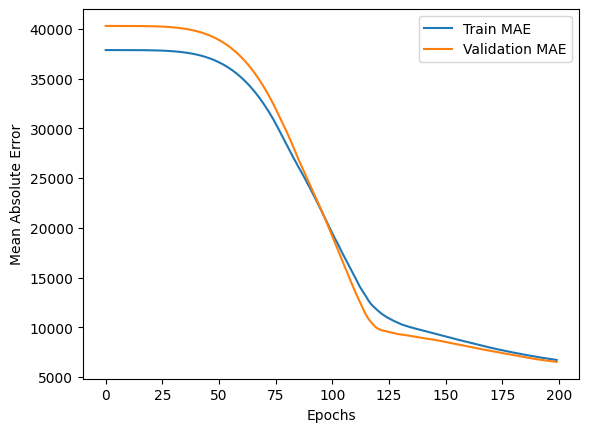

In [12]:
#plot training curve
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()